In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv")
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.drop("Unnamed: 0", axis=1,inplace=True)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
    data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
    data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
data.shape

(303, 14)

In [8]:
data.drop("target",axis=1).corrwith(data.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

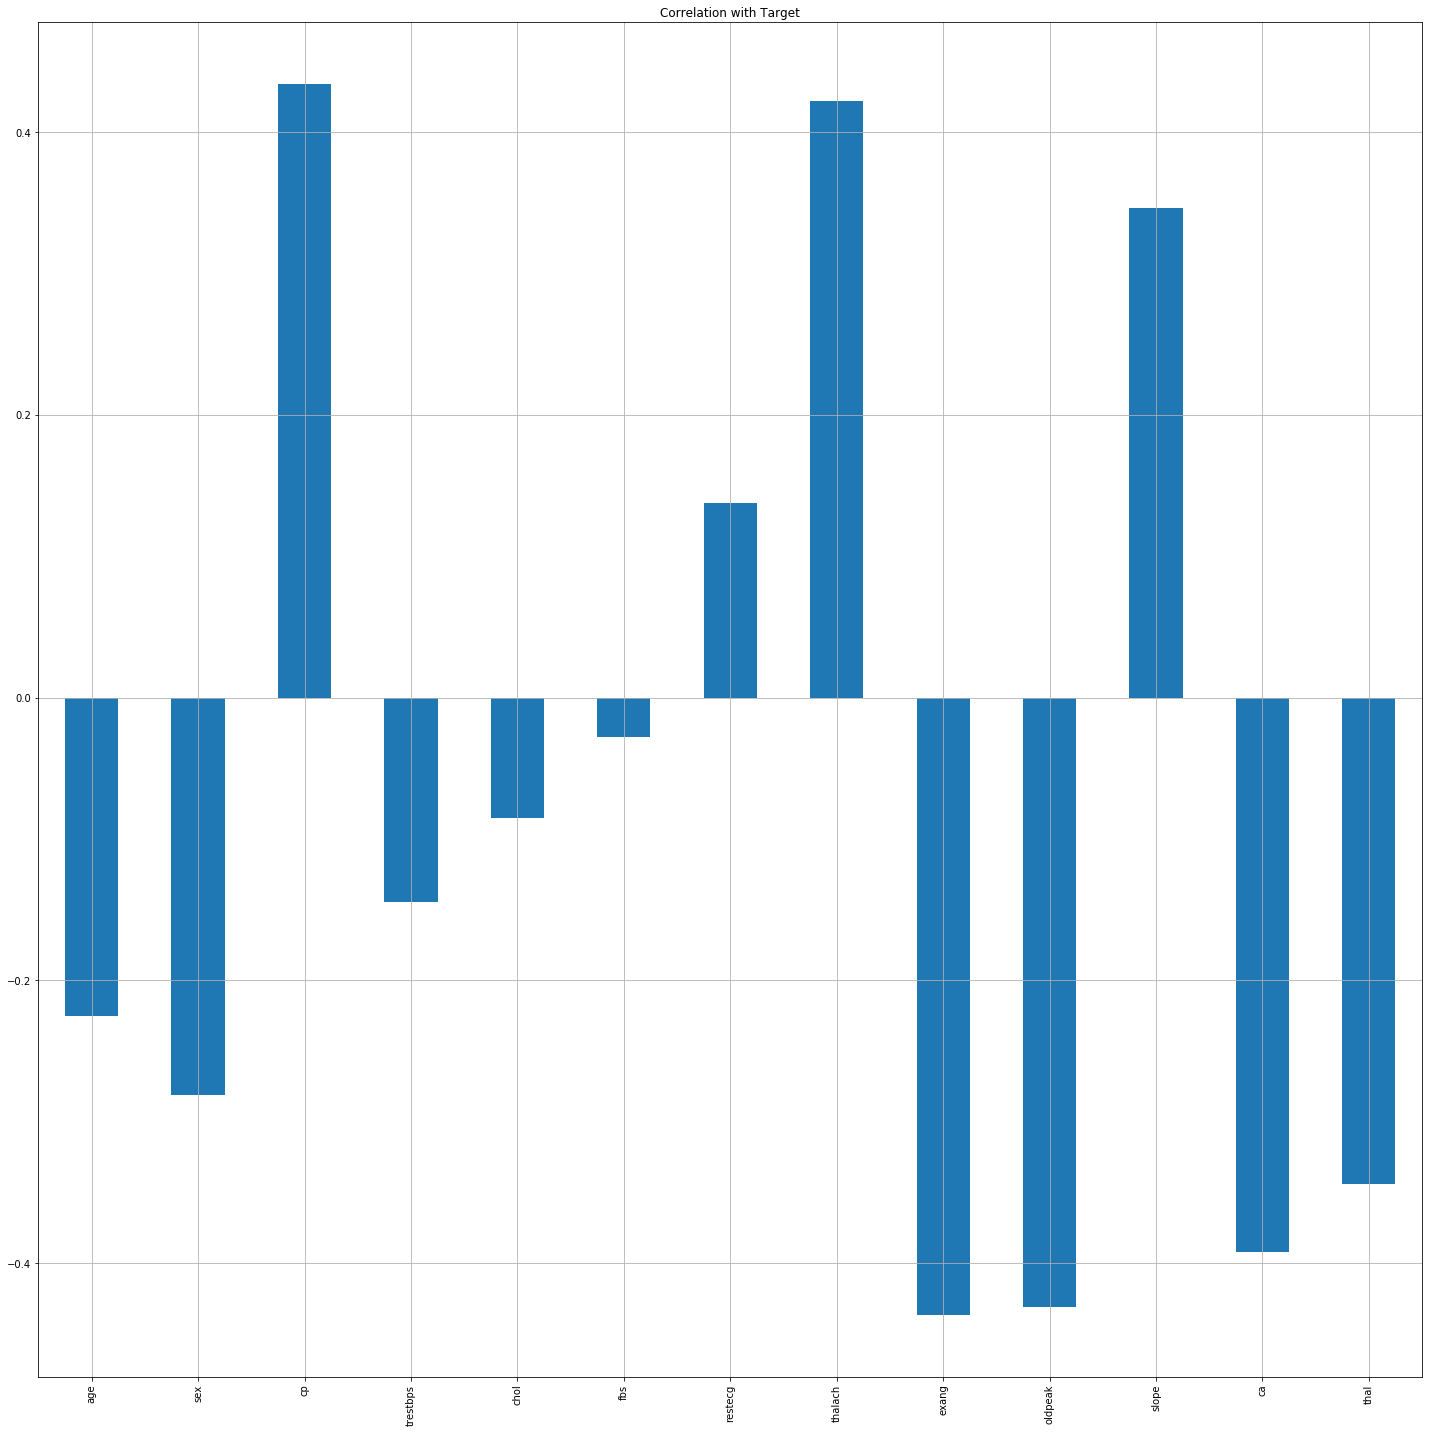

In [9]:
data.drop("target",axis=1).corrwith(data.target).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Target')
plt.tight_layout()

In [10]:
X=data.drop("target",axis=1)
Y=data.target

In [11]:
from sklearn.feature_selection import SelectPercentile,chi2
SPercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile.fit(X,Y)

SelectPercentile(percentile=80,
                 score_func=<function chi2 at 0x000001FE445A3950>)

In [1]:
col=SPercentile.get_support(indices=True)
feature=X.columns[col]

NameError: name 'SPercentile' is not defined

In [15]:
dfFeatures=pd.DataFrame({'features':X.columns,'Chi2score':SPercentile.scores_,'p_values':SPercentile.pvalues_})
dfFeatures.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,p_values
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [16]:
print(col)
print(feature)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [17]:
X=data[feature]
Y=data.target

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scalar=scalar.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scalar,Y,test_size=0.25,random_state=42)

## GradientBoostClassifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbdt=GradientBoostingClassifier()
gbdt.fit(X_train,y_train)

GradientBoostingClassifier()

In [21]:
pred=gbdt.predict(X_train)
gbdt_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
gbdt_report

,0,1,accuracy,macro avg,weighted avg
f1-score,0.995122,0.995984,0.995595,0.995553,0.995593
precision,1.000000,0.992000,0.995595,0.996000,0.995630
recall,0.990291,1.000000,0.995595,0.995146,0.995595
support,103.000000,124.000000,0.995595,227.000000,227.000000


In [36]:
print("=============Train Set=============")
print(f"\nAccuracy:{accuracy_score(y_train,pred)*100:.2f}%")
print("_____________________________________")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_train,pred)}")
print("_____________________________________")
print(f"\nClassification Report:\n{gbdt_report}")
print("_____________________________________")
print("\n\n=============Test set==============")
predTest=gbdt.predict(X_test)
print(f"\nAccuracy:{accuracy_score(y_test,predTest)*100:.2f}%")
print("_____________________________________")
print(f"\nConfusion Matrix:\n",confusion_matrix(y_test,predTest))
print("______________________________________")
print("\nCLassification Report:\n",pd.DataFrame(classification_report(y_test,predTest,output_dict=True)))
print("______________________________________")

=============Train Set=============

Accuracy:99.56%
_____________________________________

Confusion Matrix:
[[102   1]
 [  0 124]]
_____________________________________

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.995122    0.995984  0.995595    0.995553      0.995593
precision    1.000000    0.992000  0.995595    0.996000      0.995630
recall       0.990291    1.000000  0.995595    0.995146      0.995595
support    103.000000  124.000000  0.995595  227.000000    227.000000
_____________________________________


=============Test set==============

Accuracy:80.26%
_____________________________________

Confusion Matrix:
 [[28  7]
 [ 8 33]]
______________________________________

CLassification Report:
                    0          1  accuracy  macro avg  weighted avg
f1-score    0.788732   0.814815  0.802632   0.801774      0.802803
precision   0.777778   0.825000  0.802632   0.801389      0.803253
recall      0.800000

## HyperParameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
param={"max_depth":range(4,12,2),
      "learning_rate":np.arange(.5,1.4,.1),
       'min_samples_split':range(4,8,2)
      }

In [49]:
grid=GridSearchCV(gbdt,param_grid=param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.9,
                                                  max_depth=6,
                                                  min_samples_split=4),
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [50]:
grid.best_params_

{'learning_rate': 1.2999999999999998, 'max_depth': 8, 'min_samples_split': 6}

In [51]:
gbdt=grid.best_estimator_

In [52]:
gbdt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.2999999999999998, max_depth=8,
                           min_samples_split=6)

In [53]:
pred=gbdt.predict(X_train)
print("=============Train Set=============")
print(f"\nAccuracy:{accuracy_score(y_train,pred)*100:.2f}%")
print("_____________________________________")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_train,pred)}")
print("_____________________________________")
print(f"\nClassification Report:\n{gbdt_report}")
print("_____________________________________")
print("\n\n=============Test set==============")
predTest=gbdt.predict(X_test)
print(f"\nAccuracy:{accuracy_score(y_test,predTest)*100:.2f}%")
print("_____________________________________")
print(f"\nConfusion Matrix:\n",confusion_matrix(y_test,predTest))
print("______________________________________")
print("\nCLassification Report:\n",pd.DataFrame(classification_report(y_test,predTest,output_dict=True)))
print("______________________________________")

=============Train Set=============

Accuracy:100.00%
_____________________________________

Confusion Matrix:
[[103   0]
 [  0 124]]
_____________________________________

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.995122    0.995984  0.995595    0.995553      0.995593
precision    1.000000    0.992000  0.995595    0.996000      0.995630
recall       0.990291    1.000000  0.995595    0.995146      0.995595
support    103.000000  124.000000  0.995595  227.000000    227.000000
_____________________________________


=============Test set==============

Accuracy:78.95%
_____________________________________

Confusion Matrix:
 [[26  9]
 [ 7 34]]
______________________________________

CLassification Report:
                    0          1  accuracy  macro avg  weighted avg
f1-score    0.764706   0.809524  0.789474   0.787115      0.788884
precision   0.787879   0.790698  0.789474   0.789288      0.789400
recall      0.74285